In [2]:
import torch
import matplotlib.pyplot as plt
import random
import numpy as np

In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()))


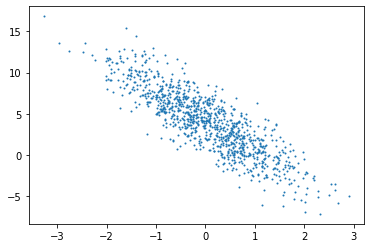

In [7]:
from IPython import display
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [8]:
import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)
for X, y in data_iter:
    print(X, y)

tensor([[-1.5279, -0.3589],
        [-1.6079, -1.4096],
        [-0.4795,  0.7580],
        [-0.8270, -1.9196],
        [-0.7631,  0.7865],
        [-1.0418,  0.5481],
        [ 0.0295, -0.8524],
        [-0.6426, -0.9081],
        [-0.8228, -0.9032],
        [-1.0798, -0.9393]]) tensor([2.3641e+00, 5.7667e+00, 6.5294e-01, 9.0585e+00, 8.3089e-04, 2.4767e-01,
        7.1575e+00, 5.9788e+00, 5.6127e+00, 5.2385e+00])
tensor([[ 1.8020e+00,  8.2634e-01],
        [-7.8894e-01,  8.1551e-01],
        [ 1.5249e-02,  1.2683e+00],
        [ 6.8411e-01, -4.1705e-01],
        [-1.9010e-01, -7.4847e-01],
        [ 7.4748e-01,  1.5769e+00],
        [-8.4075e-01, -3.6555e-01],
        [ 1.0594e-01, -1.1932e+00],
        [ 6.5259e-01,  1.0778e+00],
        [-1.4379e-03,  6.3034e-01]]) tensor([ 4.9885, -0.1433, -0.0903,  6.9845,  6.3705,  0.3436,  3.7564,  8.4580,
         1.8273,  2.0546])
tensor([[ 0.5881,  1.8757],
        [ 1.0679,  0.0744],
        [-0.8683, -0.8378],
        [ 1.5543,  0.7259],
  

In [11]:
from torch import nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    def forward(self, x):
        y = self.linear(x)
        return y
net = LinearNet(num_inputs)
print(net)
for param in net.parameters():
    print(param)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.4549,  0.0383]], requires_grad=True)
Parameter containing:
tensor([0.0445], requires_grad=True)


In [22]:
from torch.nn import init
init.normal_(net.linear.weight, 0, 0.01)
init.constant_(net.linear.bias, 0)
loss = nn.MSELoss()
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.002)

In [23]:
epochs = 30
for epoch in range(1, epochs+1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch %d loss : %f" %(epoch, l.item()))
print(net.linear.weight, net.linear.bias)

epoch 1 loss : 6.589704
epoch 2 loss : 5.095732
epoch 3 loss : 1.897931
epoch 4 loss : 2.910531
epoch 5 loss : 0.634664
epoch 6 loss : 0.184044
epoch 7 loss : 0.152334
epoch 8 loss : 0.066118
epoch 9 loss : 0.061826
epoch 10 loss : 0.020234
epoch 11 loss : 0.004741
epoch 12 loss : 0.004519
epoch 13 loss : 0.001154
epoch 14 loss : 0.001038
epoch 15 loss : 0.000540
epoch 16 loss : 0.000178
epoch 17 loss : 0.000128
epoch 18 loss : 0.000110
epoch 19 loss : 0.000035
epoch 20 loss : 0.000127
epoch 21 loss : 0.000066
epoch 22 loss : 0.000079
epoch 23 loss : 0.000129
epoch 24 loss : 0.000110
epoch 25 loss : 0.000057
epoch 26 loss : 0.000171
epoch 27 loss : 0.000069
epoch 28 loss : 0.000167
epoch 29 loss : 0.000117
epoch 30 loss : 0.000069
Parameter containing:
tensor([[ 2.0003, -3.3999]], requires_grad=True) Parameter containing:
tensor([4.2003], requires_grad=True)
